## Oppgave 1 - Zombie apokalypse 

##### Utgangspunkt:

Verden har blitt rammet av en zombie-apokalypse og alt håp virker ute. Et virus har gjort at folk som blir smittet blir gjort om til udøde skapninger som får som hovedmål å smitte og drepe andre, levende og friske mennesker, og den eneste måten å bli smitta på igjennom blod, gjennom kloring osv. . I nærheten av Washington D.C. har en gruppe på 500 mennesker søkt tilflukt i en liten avsidesliggende landsby kalt Alexandria. Her har de opprettet en mur rundt hele byen for å holde zombiene unna, i tillegg til at de har tilgang til en del mat og våpen. De må, dog, finne nye måter å få ressurser på, samt andre mennesker som trenger hjelp. Her skal vi studere utviklingen til denne landsbyen. 

##### Eulers metode

Bruker mye eulers metode i koden. Velger derfor og forklare teorien bak eulers metode før vi ser på koden. 

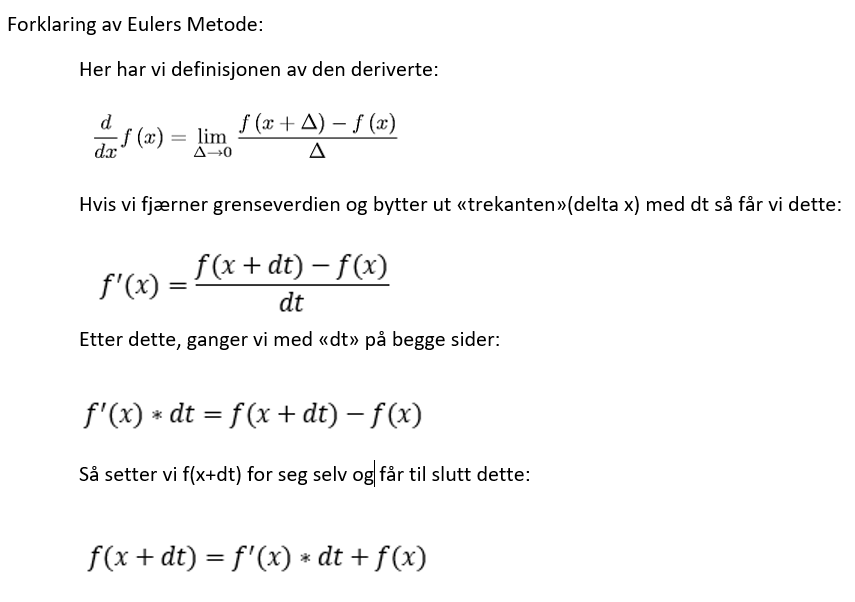

### Zombie apokalypse (Alle deloppgavene)

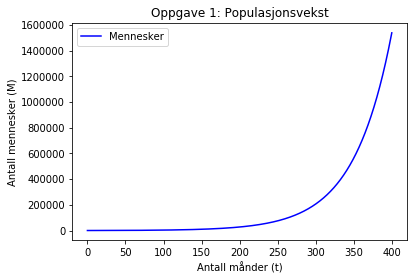

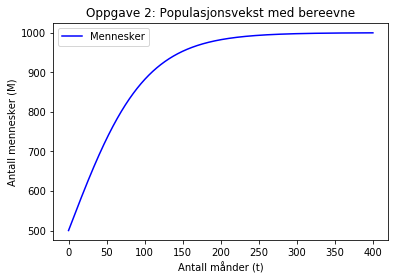

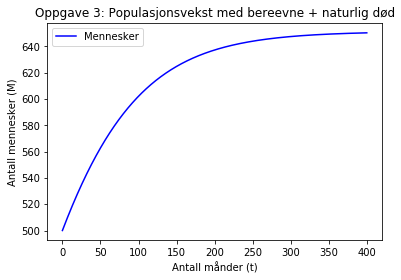

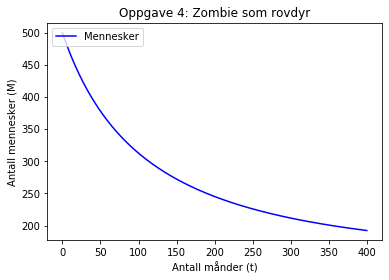

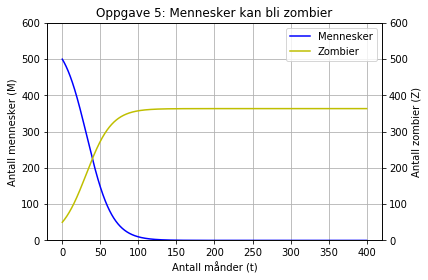

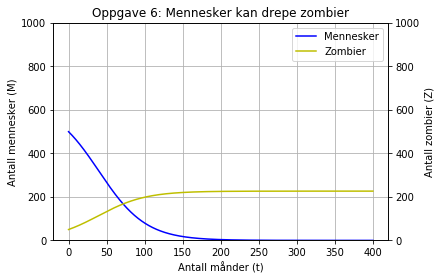

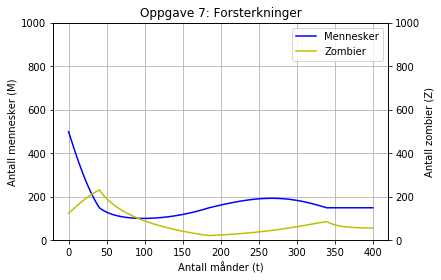

In [19]:
from pylab import *

N = 100000              # Antall intervaller 
tid = 400               # Antall månder
t0 = 0                  # Tid månder
dt = tid/(N-1)

# Mennesker - konstanter
M0 = 500                # Antall mennesker i t= 0
Mk = 0.02               # Reproduksjonsrate 
Md = 0.007              # Dødsrate
Minvander = 0.004       # Invanringsrate per måned 
Mb = 1000               # Bereevne 
hjelp = 150             # Får hjelp fra hilltop - kingdom når menesker når denne konstanten 

# Zombie - konstanter
Z0 = 50                 # Antall zombier i t0
#Zk = 0.00000001        # Zombie reproduksjonrate naer 0 

# Døds/møte konstanter 
ZMd = 0.0002            # Zombie dreper mennesker rate
MZd = 0.00005           # Mennesker dreper zombier rate
Zs = 0.5                # Zombie smitte rate

# Matriser 
t = zeros(N)
M = zeros(N)
Z = zeros(N) 
Mder = zeros(N)
Zder = zeros(N)
    
# Initierer matrisene 
t[0] = t0 
M[0] = M0   
Z[0] = Z0

# Oppgave 1: Fødsel og innvandring 
def populasjonsVekst():
   
    #Eulers metode 
    for i in range(N-1):
        # Mder = Reproduksjonsrate * (Mennesker + Mennesker*invandringsrate)
        Mder[i] = Mk * (M[i] + M[i]*Minvander)      
        M[i+1] = M[i] + Mder[i] *dt
        t[i+1] = t[i] + dt 
    
    plot(t,M, color='b', label = 'Mennesker')
    legend(loc='upper left')
    title("Oppgave 1: Populasjonsvekst")
    xlabel("Antall månder (t)")
    ylabel("Antall mennesker (M)")
    show()
    
    return

# Oppgave 2: Bæreevne
def bæreevnePopulation():
  
    #Eulers metode 
    for i in range(N-1):
        #Mder = Reproduksjonsrate * (Mennesker + Mennesker*invandringsrate) * bereevnen
        Mder[i] = Mk * (M[i] + M[i]*Minvander) * (1-M[i]/Mb)
        M[i+1] = M[i] + Mder[i] *dt
        t[i+1] = t[i] + dt 
    
    plot(t,M, color='b', label = 'Mennesker')
    legend(loc='upper left')
    title("Oppgave 2: Populasjonsvekst med bereevne")
    xlabel("Antall månder (t)")
    ylabel("Antall mennesker (M)")
    show()
    
    return

# Oppgave 3: Naturlig død
def naturligDød():
  
    #Eulers metode 
    for i in range(N-1):
        #Mder = Reproduksjonsrate * (Mennesker + Mennesker*invandringsrate) * bereevnen - naturlig død 
        Mder[i] = Mk* (M[i] + M[i]*Minvander) * (1-M[i]/Mb) - Md*M[i]
        M[i+1] = M[i] + Mder[i] *dt
        t[i+1] = t[i] + dt 
    
    plot(t,M, color='b', label = 'Mennesker')
    legend(loc='upper left')
    title("Oppgave 3: Populasjonsvekst med bereevne + naturlig død")
    xlabel("Antall månder (t)")
    ylabel("Antall mennesker (M)")
    show()
    
    return

# Oppgave 4: Zombier dreper mennesker 
def zombieRovdyr():
    
    #Eulers metode 
    for i in range(N-1):
        #Mder = Reproduksjonsrate * (Mennesker + Mennesker*invandringsrate) * bereevnen - naturlig død - drept av zombier
        Mder[i] = Mk * (M[i] + M[i]*Minvander) *(1-M[i]/Mb) - Md*M[i] - M[i]*Z0*ZMd  # Zombie populasjonen er altid det samme
        M[i+1] = M[i] + Mder[i] *dt
        t[i+1] = t[i] + dt 
    
    plot(t,M, color='b', label = 'Mennesker')
    legend(loc='upper left')
    title("Oppgave 4: Zombie som rovdyr")
    xlabel("Antall månder (t)")
    ylabel("Antall mennesker (M)")
    show()
    
    return

# Oppgave 5: Mennesker kan bli til zombier
def zombieSmitta():
  
    #Eulers metode 
    for i in range(N-1):
        #Mder = Reproduksjonsrate * (Mennesker + Mennesker*invandringsrate) * bereevnen - naturlig død - drept av zombier
        Mder[i] = Mk * (M[i] + M[i]*Minvander) *(1-M[i]/Mb) - Md*M[i] - M[i]*Z[i]*ZMd
        M[i+1] =  M[i] + Mder[i] *dt
        #Z[i+1] = Zombier + (mennesker * zombier * zombie drepe menneske rate) * zombie smite rate 
        Z[i+1] = Z[i] + (M[i]*Z[i]*ZMd)*Zs *dt
        t[i+1] = t[i] + dt 

    fig = figure()
    ax = fig.add_subplot(111)
    data1 = ax.plot(t, M, '-b', label = 'Mennesker')
    ax2 = ax.twinx()
    data2 = ax2.plot(t, Z, '-y', label = 'Zombier')

    data = data1 + data2
    datatittel = [l.get_label() for l in data]
    ax.legend(data, datatittel, loc = 0)

    ax.grid()
    ax.set_title("Oppgave 5: Mennesker kan bli zombier")
    ax.set_xlabel("Antall månder (t)")
    ax.set_ylabel("Antall mennesker (M)")
    ax2.set_ylabel("Antall zombier (Z)")
    ax2.set_ylim(0,600)
    ax.set_ylim(0,600)
    plt.show()
    
    return
    
# Oppgave 6: Mennesker kan drepe zombier 
def zombieDør():
 
    #Eulers metode 
    for i in range(N-1):
        #Mder = Reproduksjonsrate * (Mennesker + Mennesker*invandringsrate) * bereevnen - naturlig død - drept av zombier
        Mder[i] = Mk * (M[i] + M[i]*Minvander) * (1-M[i]/Mb) - Md*M[i] - M[i]*Z[i]*ZMd
        #Zder[i] = (M[i]*Z[i]*Zm) * Zs
        #Zder = (Mennesker * zombier * zombie drepe mennesker rate) * zombie smitte rate...
        #... - (mennesker * zombier * menneske drepe zombie rate)
        Zder[i] = (M[i]*Z[i]*ZMd)*Zs - (M[i]*Z[i]*MZd)  
        M[i+1] = M[i] + Mder[i] *dt
        Z[i+1] = Z[i] + Zder[i] *dt
        t[i+1] = t[i] + dt 
        
    fig = figure()
    ax = fig.add_subplot(111)
    data1 = ax.plot(t, M, '-b', label = 'Mennesker')
    ax2 = ax.twinx()
    data2 = ax2.plot(t, Z, '-y', label = 'Zombier')

    data = data1 + data2
    datatittel = [l.get_label() for l in data]
    ax.legend(data, datatittel, loc = 0)

    ax.grid()
    ax.set_title("Oppgave 6: Mennesker kan drepe zombier")
    ax.set_xlabel("Antall månder (t)")
    ax.set_ylabel("Antall mennesker (M)")
    ax2.set_ylabel("Antall zombier (Z)")
    ax2.set_ylim(0,1000)
    ax.set_ylim(0,1000)
    plt.show()
    
    return

# Oppgave 7: Aleksandri kan få forsterkninger 
def hilltopKingdom():
      
    Z[0] = Z0 +75
    
    for i in range(N-1):
        # Hvis mennesker blir lavere enn hjelp konstanten før de hjelp
        if M[i] < hjelp:
            ZMdhjelp=ZMd*0.6     # Zombie dreper mennesker raten synker - ved hjelp vil ferre zombier klare å drepe
            MZdhjelp=MZd*4       # Mennesker dreper zombie raten øker - flere mennesker = dreper flere zombier 
            #Mder = Reproduksjonsrate * (Mennesker + Mennesker*invandringsrate) * bereevnen - naturlig død 
            #... - (mennesker * zombier * zombie drepe mennesker med hjelp rate
            Mder[i] = Mk * (M[i] + M[i]*Minvander) * (1-M[i]/Mb) - Md*M[i] - (M[i])*Z[i]*ZMdhjelp
            #Zder = (Mennesker * zombier * zombie drepe mennesker med hjelp rate) * zombie smitte rate...
            #... - (mennesker * zombier * menneske drepe zombie med hjelp rate)
            Zder[i] = (M[i]*Z[i]*ZMdhjelp)*Zs - (M[i]*Z[i]*MZdhjelp)  
            M[i+1] = M[i] + Mder[i] *dt
            Z[i+1] = Z[i] + Zder[i] *dt
            t[i+1] = t[i] + dt 
        # Vil kjøre som før hvis mennesker er høyere enn hjelp konstanten 
        else:
            Mder[i] = Mk * (M[i] + M[i]*Minvander) * (1-M[i]/Mb) - Md*M[i] - (M[i])*Z[i]*ZMd
            Zder[i] = (M[i]*Z[i]*ZMd)*Zs - (M[i]*Z[i]*MZd)  
            M[i+1] = M[i] + Mder[i] *dt
            Z[i+1] = Z[i] + Zder[i] *dt
            t[i+1] = t[i] + dt    
        
    fig = figure()
    ax = fig.add_subplot(111)
    data1 = ax.plot(t, M, '-b', label = 'Mennesker')
    ax2 = ax.twinx()
    data2 = ax2.plot(t, Z, '-y', label = 'Zombier')

    data = data1 + data2
    datatittel = [l.get_label() for l in data]
    ax.legend(data, datatittel, loc = 0)

    ax.grid()
    ax.set_title("Oppgave 7: Forsterkninger")
    ax.set_xlabel("Antall månder (t)")
    ax.set_ylabel("Antall mennesker (M)")
    ax2.set_ylabel("Antall zombier (Z)")
    ax2.set_ylim(0,1000)
    ax.set_ylim(0,1000)
    plt.show()
    
    return 

# # ut hvis man ikke vil se alle på en gang
populasjonsVekst()
bæreevnePopulation()
naturligDød()
zombieRovdyr()  
zombieSmitta()
zombieDør()
hilltopKingdom()  

### Konklusjon
##### Oppgave 1 
Befolkningen øker raskt, det er ingen ting som hindrer populasjonsveksten, ingen dør, i tilleg øker det ikke bare med reproduskjon, men også med invandrere. Mennesker vil dermed bare forsette og vokse i dette scenarioet. 
##### Oppgave 2
Aleksandria har ikke ressurser for uendelig mange mennesker, derfor må vi legge til en bæreevne. Bæreevne er den eneste begrensningen på populasjonen. Befolkningen øker dermed fremdelse rask, men det vil satbilisere seg ved bereevne. 
##### Oppgave 3
Med naturligdød vil befolkningen vokse saktere, og stabilisere seg før bereevnen er nåd. Det er fordi de ikke reproduserer nokk til å stabilsere seg på bereevnen. 
##### Oppgave 4
Nå som mennesker blir utsatt for ett rovdyr, stabiliserer det seg ikke lenger som før. Men grafen synker ettersom det blir drept flere mennesker enn det blir født/innvandret. 
##### Oppgave 5
Nå som zombie populasjonen kan øke får den en egen graf. Ser at det er en drastisk økning i zombier, som fører til at de tar knekken på menneksene mye tidligere enn i oppgave 4.
##### Oppgave 6
Mennesker kan nå slå tilbake på zombiene. Zombiene er for sterke og tar forsatt knekken på menneskene. Men siden de nå dør vokser de saktere, dermed tar det lenger tid før de vinner over menneskene.  
##### Oppgave 7
Ser på kurven at når mennesker går under 150, vokser menneske populasjoenen igjen og zombie populasjonen går ned. Det er fordi de får hjelp fra Kingdom og Hiltop. Når menneske populasjonen kommer seg over 150 igjen, får de ikke mer hjelp. Zombiene vokser dermed litt og flere mennesker blir drept. 